library and function import 

In [1]:
import sys
import pandas as pd
import numpy as np
import os
import talib

# Add the scripts folder to the Python path
sys.path.append(os.path.abspath("../scripts"))

# Now you can import the functions from data_loader
from data_loader import load_dataset, load_all_data
from data_visualization import plot_publication_trends, plot_sentiment_distribution, plot_close_price_with_moving_averages,plot_rsi,plot_macd,plot_sentiment_vs_stock
from data_analysis import calculate_text_lengths, articles_per_publisher, publication_trends,extract_keywords,calculate_technical_indicators,prepare_data,calculate_correlation,sentiment_analysis
from sentiment_analysis import sentiment_analysis

loade Data

In [2]:
# Define the path to a specific file
file_path = "../Data/raw_analyst_ratings.csv"

# Load a single dataset
data_frame = load_dataset(file_path)

# Display the first few rows of the loaded dataset
print(data_frame.head(2))

Dataset loaded successfully from: ../Data/raw_analyst_ratings.csv
   Unnamed: 0                                    headline  \
0           0     Stocks That Hit 52-Week Highs On Friday   
1           1  Stocks That Hit 52-Week Highs On Wednesday   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  


In [3]:
# Step 1: Drop rows with null values in critical columns (e.g., 'headline', 'publisher', 'date')
data_frame = data_frame.dropna(subset=['headline', 'publisher', 'date'])

# Step 2: Remove rows where the 'headline' column is empty or has invalid data
data_frame = data_frame[data_frame['headline'].str.strip() != '']

# Step 3: Check for and remove duplicate rows
data_frame = data_frame.drop_duplicates()

# Step 4: Ensure 'date' column is in datetime format
data_frame['date'] = pd.to_datetime(data_frame['date'], errors='coerce')

# Drop rows where 'date' couldn't be converted (i.e., invalid date formats)
data_frame = data_frame.dropna(subset=['date'])

# Now, proceed with your analysis
text_stats = calculate_text_lengths(data_frame, column='headline')
print("Text Length Statistics:")
print(text_stats)

# Articles per publisher
publisher_counts = articles_per_publisher(data_frame, column='publisher')
print("\nArticles per Publisher:")
print(publisher_counts)

# Publication trends
publication_counts = publication_trends(data_frame, column='date')
print("\nPublication Trends:")
print(publication_counts)


Text Length Statistics:
         Unnamed: 0   text_length
count  4.147300e+04  41473.000000
mean   5.348773e+05     79.649555
std    3.035404e+05     55.670238
min    0.000000e+00     15.000000
25%    2.693460e+05     42.000000
50%    5.336570e+05     62.000000
75%    7.991390e+05     91.000000
max    1.053652e+06    512.000000

Articles per Publisher:
publisher
Benzinga Newsdesk    11174
Lisa Levin            9412
ETF Professor         3184
Paul Quintaro         3035
Benzinga Newsdesk     2298
                     ...  
Tim Melvin               1
Ritesh Anan              1
Sam Liu                  1
Ken Shreve               1
Aaron Jackson.Ed         1
Name: count, Length: 203, dtype: int64

Publication Trends:
date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     18
2020-06-08    564
2020-06-09    581
2020-06-10    552
2020-06-11    302
Length: 2418, dtype: int64


 Plot publication trends and sentiment distribution

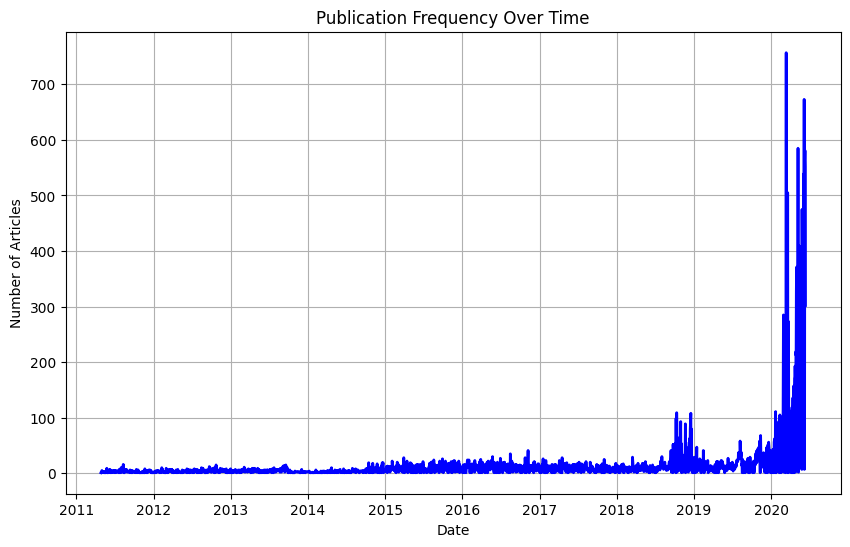

In [4]:
# Plot publication trends
plot_publication_trends(publication_counts)

# # Plot sentiment distribution
# plot_sentiment_distribution(data_frame, column='sentiment')


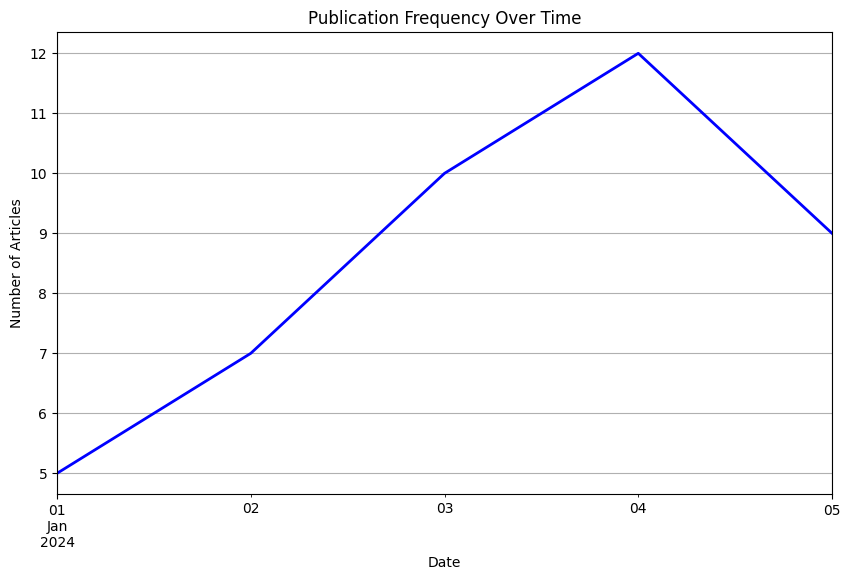

Select a company from the following list:
1. APPLE
2. AMAZON
3. GOOGLE
4. META
5. MICROSOFT
6. NVIDIA
7. TESLA
Selected Company: MICROSOFT
Stock Ticker: MSFT
News Data Path: ../Data/raw_analyst_ratings.csv
Stock Data Path: ../Data/yfinance_data/MSFT_historical_data.csv
Dataset loaded successfully from: ../Data/raw_analyst_ratings.csv
Dataset loaded successfully from: ../Data/yfinance_data/MSFT_historical_data.csv
No data found for stock ticker: MSFT
No sentiment data available to plot.


In [5]:

# Example of publication counts over time (replace with your actual data)
publication_counts = pd.Series([5, 7, 10, 12, 9], 
                               index=pd.date_range('2024-01-01', periods=5, freq='D'))

# Plot publication trends over time
plot_publication_trends(publication_counts)


# Import necessary libraries


# Stock ticker and data path mapping
stock_data_mapping = {
    1: ("APPLE", "AAPL", "../Data/yfinance_data/AAPL_historical_data.csv"),
    2: ("AMAZON", "AMZN", "../Data/yfinance_data/AMZN_historical_data.csv"),
    3: ("GOOGLE", "GOOG", "../Data/yfinance_data/GOOG_historical_data.csv"),
    4: ("META", "FAC", "../Data/yfinance_data/META_historical_data.csv"),
    5: ("MICROSOFT", "MSFT", "../Data/yfinance_data/MSFT_historical_data.csv"),
    6: ("NVIDIA", "NVDA", "../Data/yfinance_data/NVDA_historical_data.csv"),
    7: ("TESLA", "TSL", "../Data/yfinance_data/TSLA_historical_data.csv")
}

# News data path (same for all companies)
news_data_path = "../Data/raw_analyst_ratings.csv"

# Display the company selection menu
print("Select a company from the following list:")
for num, (company, ticker, path) in stock_data_mapping.items():
    print(f"{num}. {company}")

# User Input: Select a company by number
try:
    selected_number = int(input("Enter the number corresponding to the company (e.g., 1 for APPLE):to see their sentiment distribution  "))
    if selected_number in stock_data_mapping:
        selected_company, stock_ticker, stock_data_path = stock_data_mapping[selected_number]
        print(f"Selected Company: {selected_company}")
        print(f"Stock Ticker: {stock_ticker}")
        print(f"News Data Path: {news_data_path}")
        print(f"Stock Data Path: {stock_data_path}")
    else:
        raise ValueError("Invalid number selected. Please choose a valid option from the list.")
except ValueError as e:
    print(f"Error: {e}")
    raise

# Step 1: Load the datasets
try:
    news_df = load_dataset(news_data_path)
    stock_df = load_dataset(stock_data_path)
except Exception as e:
    print(f"Error loading datasets: {e}")
    raise

# Step 2: Perform Sentiment Analysis
try:
    # Pass the stock ticker to the sentiment analysis function
    news_df = sentiment_analysis(news_df, stock_ticker)
except Exception as e:
    print(f"Error during sentiment analysis: {e}")
    raise


# Plot sentiment distribution
plot_sentiment_distribution(news_df)


Plot Close Price with Moving Averages, RSI And MACD

Datasets loaded: ['AAPL_historical_data.csv', 'AMZN_historical_data.csv', 'GOOG_historical_data.csv', 'META_historical_data.csv', 'MSFT_historical_data.csv', 'NVDA_historical_data.csv', 'TSLA_historical_data.csv']
Selected dataset: AAPL_historical_data.csv


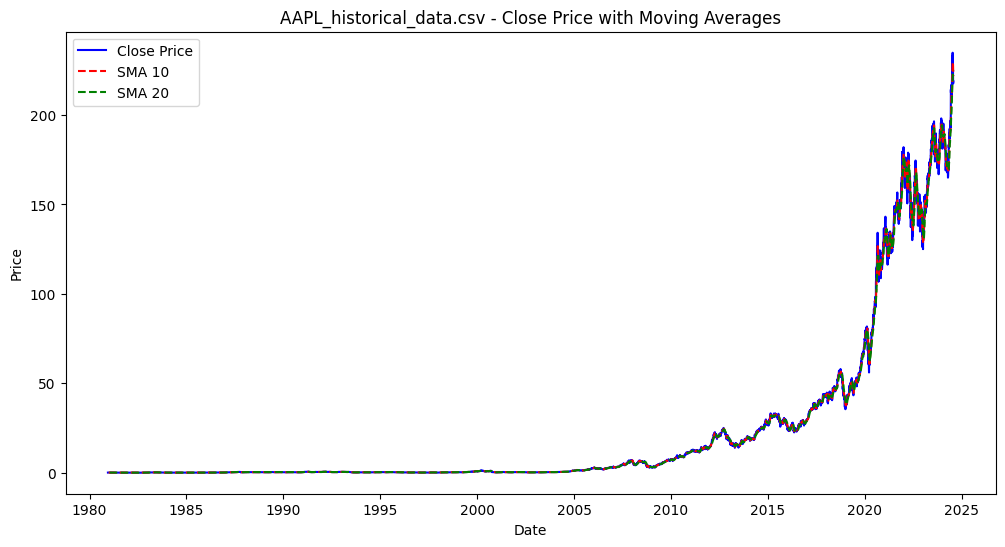

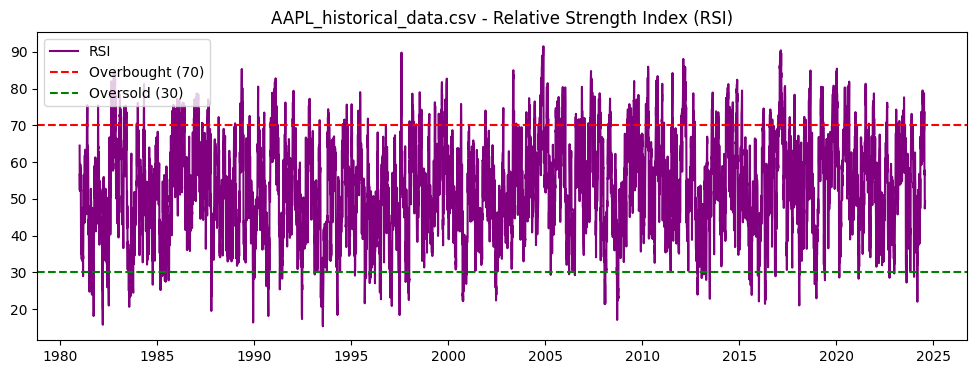

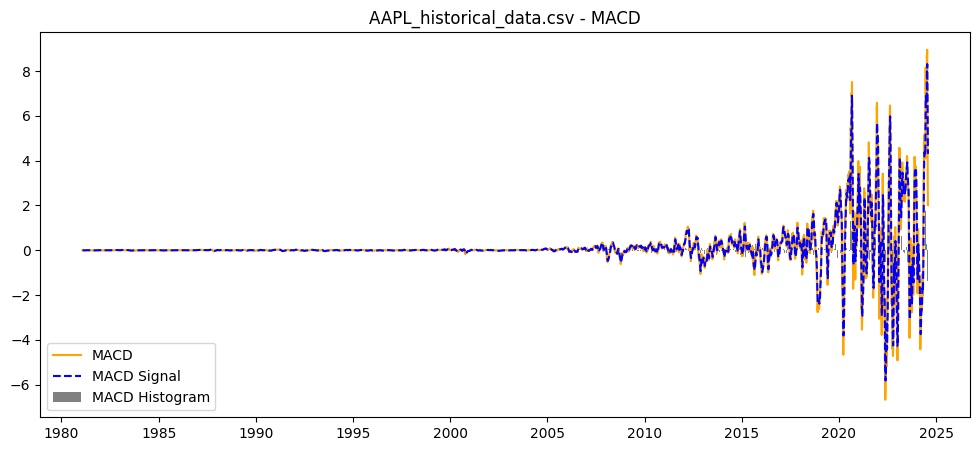

In [7]:
# Display the available datasets
print(f"Datasets loaded: {list(data_frames.keys())}")

# Select a specific dataset (e.g., "AAPL.csv")
data_key = "AAPL_historical_data.csv"  # Replace with your desired dataset name
if data_key in data_frames:
    df = data_frames[data_key]
    print(f"Selected dataset: {data_key}")
else:
    print(f"Dataset {data_key} not found!")
    df = None

# Check if the DataFrame is loaded
if df is not None:
    # Ensure the dataset has the required columns
    required_columns = ["Open", "High", "Low", "Close", "Volume"]
    if all(col in df.columns for col in required_columns):
        # Prepare the data: Ensure datetime format and sorting
        if "Date" in df.columns:
            df["Date"] = pd.to_datetime(df["Date"])
            df.sort_values(by="Date", inplace=True)
            df.set_index("Date", inplace=True)

        # Calculate technical indicators
        df = calculate_technical_indicators(df)  # This will add the indicators to the dataframe

        # Visualization
        plot_close_price_with_moving_averages(df, data_key)  # Plot Close Price with Moving Averages
        plot_rsi(df, data_key)  # Plot RSI
        plot_macd(df, data_key)  # Plot MACD

    else:
        print("The dataset does not contain all the required columns.")
else:
    print("No data to analyze.")


Select a company from the following list:
1. APPLE
2. AMAZON
3. GOOGLE
4. META
5. MICROSOFT
6. NVIDIA
7. TESLA
Selected Company: AMAZON
Stock Ticker: AMZN
News Data Path: ../Data/raw_analyst_ratings.csv
Stock Data Path: ../Data/yfinance_data/AMZN_historical_data.csv
Dataset loaded successfully from: ../Data/raw_analyst_ratings.csv
Dataset loaded successfully from: ../Data/yfinance_data/AMZN_historical_data.csv
Sentiment analysis complete for stock: AMZN
                                                headline  Sentiment
76177  How Cannabis Company Cannaphyll Is Marketing O...   0.000000
76178  Tech Stocks And FAANGS Strong Again To Start D...   0.433333
76179  Benzinga Pro's Top 5 Stocks To Watch For Wed.,...   0.500000
76180  Hearing Vertical Group Out Positive On Amazon,...   0.227273
76181  Big Tech Reaches New Record Heights At The Sto...   0.068182
76182  Twitter, Square Will Mark Juneteenth As Holida...   0.000000
76183  'Inside Amazon's plan to test warehouse worker...   0.00000

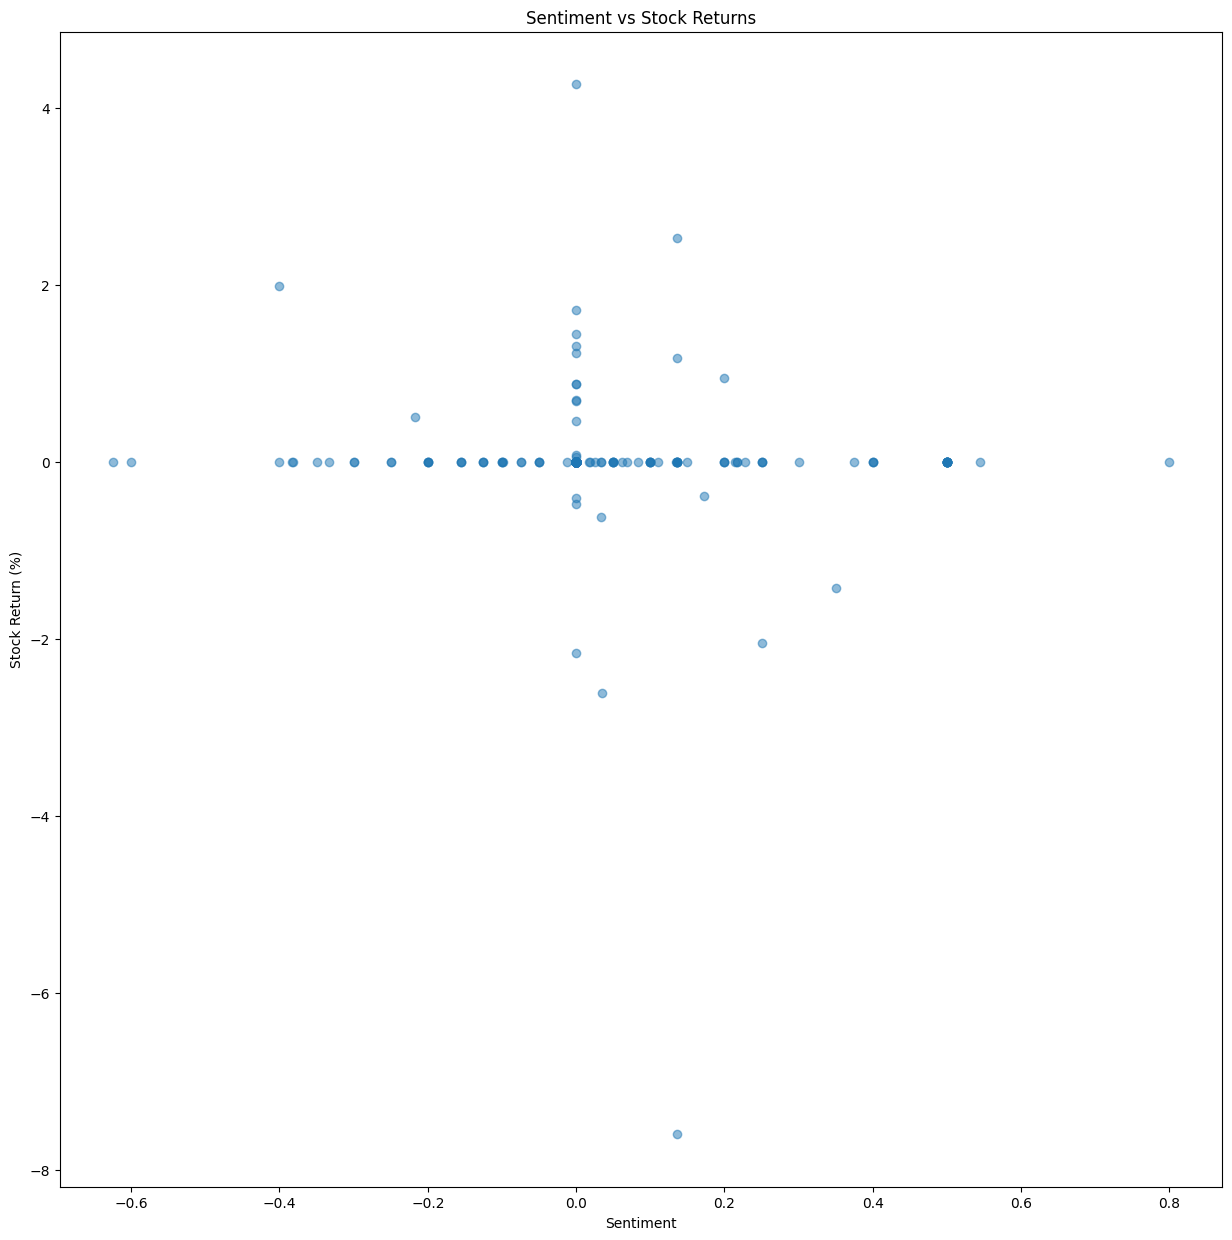

In [8]:
# Import necessary libraries


# Stock ticker and data path mapping
stock_data_mapping = {
    1: ("APPLE", "AAPL", "../Data/yfinance_data/AAPL_historical_data.csv"),
    2: ("AMAZON", "AMZN", "../Data/yfinance_data/AMZN_historical_data.csv"),
    3: ("GOOGLE", "GOOG", "../Data/yfinance_data/GOOG_historical_data.csv"),
    4: ("META", "FAC", "../Data/yfinance_data/META_historical_data.csv"),
    5: ("MICROSOFT", "MSFT", "../Data/yfinance_data/MSFT_historical_data.csv"),
    6: ("NVIDIA", "NVDA", "../Data/yfinance_data/NVDA_historical_data.csv"),
    7: ("TESLA", "TSL", "../Data/yfinance_data/TSLA_historical_data.csv")
}

# News data path (same for all companies)
news_data_path = "../Data/raw_analyst_ratings.csv"

# Display the company selection menu
print("Select a company from the following list:")
for num, (company, ticker, path) in stock_data_mapping.items():
    print(f"{num}. {company}")

# User Input: Select a company by number
try:
    selected_number = int(input("Enter the number corresponding to the company (e.g., 1 for APPLE): "))
    if selected_number in stock_data_mapping:
        selected_company, stock_ticker, stock_data_path = stock_data_mapping[selected_number]
        print(f"Selected Company: {selected_company}")
        print(f"Stock Ticker: {stock_ticker}")
        print(f"News Data Path: {news_data_path}")
        print(f"Stock Data Path: {stock_data_path}")
    else:
        raise ValueError("Invalid number selected. Please choose a valid option from the list.")
except ValueError as e:
    print(f"Error: {e}")
    raise

# Step 1: Load the datasets
try:
    news_df = load_dataset(news_data_path)
    stock_df = load_dataset(stock_data_path)
except Exception as e:
    print(f"Error loading datasets: {e}")
    raise

# Step 2: Perform Sentiment Analysis
try:
    # Pass the stock ticker to the sentiment analysis function
    news_df = sentiment_analysis(news_df, stock_ticker)
except Exception as e:
    print(f"Error during sentiment analysis: {e}")
    raise

# Step 3: Prepare the data
try:
    merged_df = prepare_data(news_df, stock_df)
except Exception as e:
    print(f"Error preparing data: {e}")
    raise

# Step 4: Calculate the correlation between sentiment and stock returns
try:
    correlation = calculate_correlation(merged_df)
    print(f"Correlation between news sentiment and stock returns for {selected_company}: {correlation}")
except Exception as e:
    print(f"Error calculating correlation: {e}")
    raise

# Step 5: Visualize sentiment vs stock returns
try:
    plot_sentiment_vs_stock(merged_df)
except Exception as e:
    print(f"Error during visualization: {e}")
    raise
